In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

In [2]:
#
import math
import os
from pathlib import Path

In [3]:
columns = ([
'duration','protocol_type','service','flag','src_bytes','dst_bytes',
'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
])
len(columns)

41

In [4]:
attacks_types = {
  'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l',
}

attack_families = ['normal', 'dos', 'u2r', 'r2l', 'probe']

In [7]:
# Total rows: 494021 (This is 10% data)
root_path = Path(os.path.abspath(""))
data_path = os.path.join(root_path.parent.parent, 'data', 'kdd_cup','KDD_Data_10pc', 'kddcup_data_10_percent.csv')
# df = pd.read_csv(data_path, names=[*columns,'attack'], nrows=1000)
df = pd.read_csv(data_path, names=[*columns,'attack'])
df['attack'] = df['attack'].apply(lambda r: r[:-1])
df['attack_type'] = df['attack'].apply(lambda r:attacks_types[r])
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   attack  atack_type  
0  normal      normal  
1  normal      normal  
2  normal      normal  
3  normal      normal  
4  normal      normal  

[5 rows x 43 columns]

In [8]:
cat_cols = []
for col in df.columns:
    try :
        df[col] = df[col].astype(float)
    except:
        df[col] = df[col].astype('category')
        cat_cols.append(col)
cat_cols

['protocol_type', 'service', 'flag', 'attack', 'atack_type']

## Categorical columns

In [17]:
df.describe(include=['category'])

protocol_type service    flag  attack atack_type
count         494021  494021  494021  494021     494021
unique             3      66      11      23          5
top             icmp   ecr_i      SF   smurf        dos
freq          283602  281400  378440  280790     391458

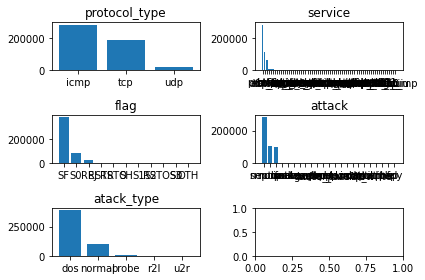

In [11]:
cols = 2
rows = math.ceil(len(cat_cols) / 2)
fig, axs = plt.subplots(rows, cols)

for (i, cat_col) in enumerate(cat_cols):
    g_c = i % cols
    g_r = int(i /cols)
    vc = df[cat_col].value_counts()
    axs[g_r, g_c].bar(vc.index, vc.values)
    axs[g_r, g_c].set_title(cat_col)
fig.tight_layout()

<AxesSubplot:>

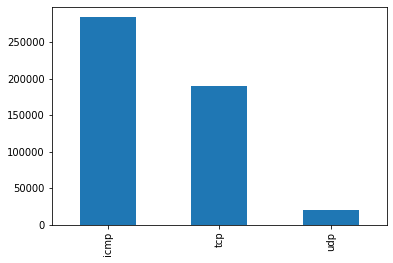

In [12]:
# Protocol type
df[cat_cols[0]].value_counts().plot(kind='bar')

<AxesSubplot:>

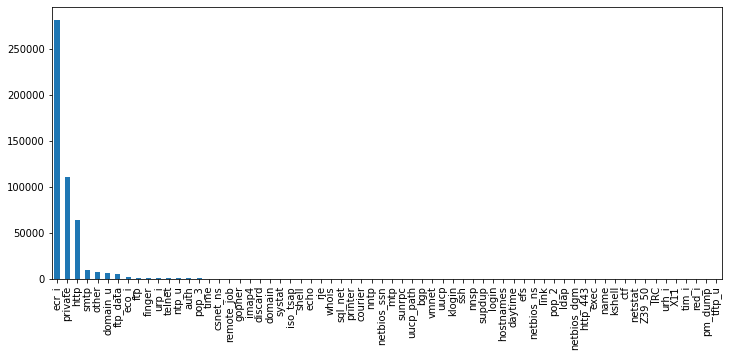

In [21]:
# Service
df[cat_cols[1]].value_counts().plot(kind='bar', figsize=(12,5))

<AxesSubplot:>

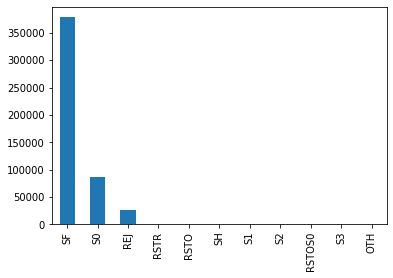

In [14]:
# Flag
df[cat_cols[2]].value_counts().plot(kind='bar')

<AxesSubplot:>

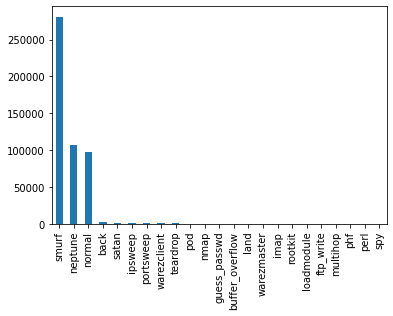

In [15]:
# Attack
df[cat_cols[3]].value_counts().plot(kind='bar')

<AxesSubplot:>

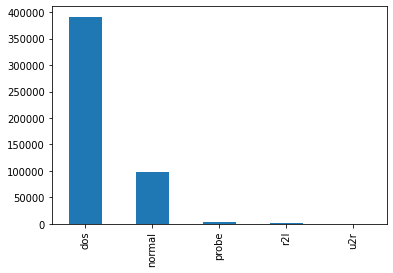

In [16]:
# Attack Type
df[cat_cols[4]].value_counts().plot(kind='bar')

## Numerical columns

In [ ]:
g = sns.FacetGrid(df, col='duration', height=4, aspect=1.2)
g.map(sns.histplot, 'attack_type')

In [ ]:
df = df.dropna('columns')# drop columns with NaN

# df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

normal_df = df[df['attack_type'] == 'normal']
attack_df_dos = df[df['attack_type'] == 'dos']
attack_df_probe = df[df['attack_type'] == 'probe']
attack_df_r2l = df[df['attack_type'] == 'r2l']
attack_df_u2r = df[df['attack_type'] == 'u2r']

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [ ]:
corr = normal_df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [ ]:
corr = attack_df_dos.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [ ]:
corr = attack_df_probe.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [ ]:
corr = attack_df_r2l.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [ ]:
corr = attack_df_u2r.corr()
plt.figure(figsize=(18,15))
sns.heatmap(cor)#,annot=True
plt.show()

In [22]:
import statsmodels
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
iris = sns.load_dataset('iris')
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/statsmodels/nonparametric/sm

KeyboardInterrupt: 